# LangGraph Router - LLM Agent with Tool Routing

This notebook demonstrates the LangGraph workflow with:
- **LLM Agent** that decides when to call tools
- **Automatic Tool Routing** with ToolNode
- **Multiply Tool** for calculations

In [1]:
# Setup - Add parent directory to path
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

# Import the workflow
from main import create_workflow, run_workflow
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

print("✅ Imports successful!")
print("📦 Workflow loaded from main.py")

✅ Imports successful!
📦 Workflow loaded from main.py


In [2]:
# Test 1: Multiplication Question
print("🧪 Test 1: Multiplication Question")
print("=" * 60)
result1 = run_workflow("What is 25 multiplied by 4?")

🧪 Test 1: Multiplication Question
🚀 Starting LangGraph Workflow with LLM Agent
📥 Input: What is 25 multiplied by 4?
🤖 Agent: Analyzing request...
   → Tool call requested: multiply_numbers
🔢 Multiply Numbers Tool: 25 × 4 = 100
🤖 Agent: Analyzing request...
   → Tool call requested: multiply_numbers
🔢 Multiply Numbers Tool: 25 × 4 = 100
🤖 Agent: Analyzing request...
   → Direct response: 25 multiplied by 4 is 100.

📤 Output: 25 multiplied by 4 is 100.
✅ Workflow completed!
🤖 Agent: Analyzing request...
   → Direct response: 25 multiplied by 4 is 100.

📤 Output: 25 multiplied by 4 is 100.
✅ Workflow completed!


In [3]:
# Test 2: General Question (No tool needed)
print("\n🧪 Test 2: General Question")
print("=" * 60)
result2 = run_workflow("What is the capital of France?")


🧪 Test 2: General Question
🚀 Starting LangGraph Workflow with LLM Agent
📥 Input: What is the capital of France?
🤖 Agent: Analyzing request...
   → Direct response: The capital of France is Paris.

📤 Output: The capital of France is Paris.
✅ Workflow completed!
🤖 Agent: Analyzing request...
   → Direct response: The capital of France is Paris.

📤 Output: The capital of France is Paris.
✅ Workflow completed!


📊 Workflow Structure
Graph nodes: ['__start__', 'input_processor', 'agent', 'tools', 'output', '__end__']

Workflow created successfully!

✅ Mermaid diagram generated!

📋 Mermaid Code:
------------------------------------------------------------
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	input_processor(input_processor)
	agent(agent)
	tools(tools)
	output(output)
	__end__([<p>__end__</p>]):::last
	__start__ --> input_processor;
	agent -. &nbsp;end&nbsp; .-> output;
	agent -.-> tools;
	input_processor --> agent;
	tools --> agent;
	output --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

------------------------------------------------------------

💡 Copy the code above to https://mermaid.live to visualize


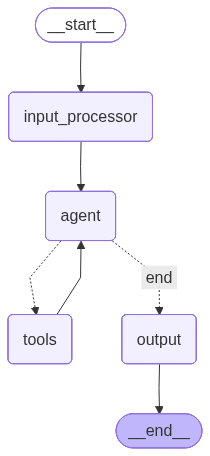


✅ Graph visualization displayed!


In [4]:
# Test 3: Visualize the Workflow Graph
from IPython.display import Image, display

print("📊 Workflow Structure")
print("=" * 60)

app = create_workflow()

# Get graph info
print(f"Graph nodes: {list(app.get_graph().nodes.keys())}")
print(f"\nWorkflow created successfully!")

# Try to render the graph
try:
    # Get Mermaid diagram
    mermaid_text = app.get_graph().draw_mermaid()
    print("\n✅ Mermaid diagram generated!")
    print("\n📋 Mermaid Code:")
    print("-" * 60)
    print(mermaid_text)
    print("-" * 60)
    print("\n💡 Copy the code above to https://mermaid.live to visualize")
    
    # Try PNG rendering
    try:
        img = app.get_graph().draw_mermaid_png()
        display(Image(img))
        print("\n✅ Graph visualization displayed!")
    except:
        print("\n⚠️ PNG rendering failed (network issue)")
        print("💡 Use LangGraph Studio: langgraph dev")
        
except Exception as e:
    print(f"❌ Error generating diagram: {e}")

In [5]:
# Test 4: Interactive Testing - Try Your Own Question!
print("🎯 Interactive Testing")
print("=" * 60)
print("Examples:")
print("  - 'What is 50 times 20?'")
print("  - 'Tell me about Python'")
print("  - 'Calculate 7 multiplied by 9'")
print("=" * 60)

your_question = input("\n💬 Enter your question: ")
if your_question:
    result = run_workflow(your_question)

🎯 Interactive Testing
Examples:
  - 'What is 50 times 20?'
  - 'Tell me about Python'
  - 'Calculate 7 multiplied by 9'
🚀 Starting LangGraph Workflow with LLM Agent
📥 Input: hi
🚀 Starting LangGraph Workflow with LLM Agent
📥 Input: hi
🤖 Agent: Analyzing request...
   → Direct response: Hello! How can I assist you today?

📤 Output: Hello! How can I assist you today?
✅ Workflow completed!
🤖 Agent: Analyzing request...
   → Direct response: Hello! How can I assist you today?

📤 Output: Hello! How can I assist you today?
✅ Workflow completed!


In [6]:
# Test 5: Inspect the Agent's Decision Making
print("🔍 Understanding Agent Decisions")
print("=" * 60)

# Create a test case
test_question = "Multiply 12 and 15"

app = create_workflow()
initial_state = {
    "input_text": test_question,
    "processed_text": "",
    "transformed_text": "",
    "output_text": "",
    "step": "",
    "messages": []
}

print(f"Question: {test_question}")
print("\n📝 Workflow Execution:")

# Run and inspect
result = app.invoke(initial_state)

print("\n📊 Final State:")
print(f"  - Messages: {len(result.get('messages', []))} messages in conversation")
print(f"  - Output: {result.get('output_text', 'N/A')}")
print(f"  - Step: {result.get('step', 'N/A')}")

# Show message types
print("\n💬 Message Flow:")
for i, msg in enumerate(result.get('messages', []), 1):
    msg_type = type(msg).__name__
    content = getattr(msg, 'content', '')[:50] + '...' if len(getattr(msg, 'content', '')) > 50 else getattr(msg, 'content', '')
    tool_calls = getattr(msg, 'tool_calls', None)
    print(f"  {i}. {msg_type}")
    if content:
        print(f"     Content: {content}")
    if tool_calls:
        print(f"     Tool Calls: {len(tool_calls)} call(s)")

🔍 Understanding Agent Decisions
Question: Multiply 12 and 15

📝 Workflow Execution:
📥 Input: Multiply 12 and 15
🤖 Agent: Analyzing request...
   → Tool call requested: multiply_numbers
🔢 Multiply Numbers Tool: 12 × 15 = 180
🤖 Agent: Analyzing request...
   → Tool call requested: multiply_numbers
🔢 Multiply Numbers Tool: 12 × 15 = 180
🤖 Agent: Analyzing request...
   → Direct response: The product of 12 and 15 is 180.

📤 Output: The product of 12 and 15 is 180.

📊 Final State:
  - Messages: 4 messages in conversation
  - Output: The product of 12 and 15 is 180.
  - Step: 

💬 Message Flow:
  1. HumanMessage
     Content: Multiply 12 and 15
  2. AIMessage
     Tool Calls: 1 call(s)
  3. ToolMessage
     Content: 180
  4. AIMessage
     Content: The product of 12 and 15 is 180.
🤖 Agent: Analyzing request...
   → Direct response: The product of 12 and 15 is 180.

📤 Output: The product of 12 and 15 is 180.

📊 Final State:
  - Messages: 4 messages in conversation
  - Output: The product of 12